In [32]:
# Imports
import numpy as np
from pbarlike import  data, propagation, drn_interface
from pbarlike import solar_modulation
import matplotlib.pyplot as plt
plt.style.use('seaborn-v0_8-colorblind')

In [33]:
# Parameters
m_DM = np.array([100])
b_bbar_bf = np.array([1.000e-05, 1.000e-05, 9.993e-01, 1.000e-05, 1.000e-05, 1.000e-05,  1.000e-05, 1.000e-05])
sv = 3e-26
pp_db = drn_interface.create_DIFF_BRK_parameters()
pp_ib = drn_interface.create_INJ_BRK_parameters()
pp = [pp_db,pp_ib]
pm = ["DIFF.BRK","INJ.BRK"]
V_pbar = [0.611,0.455] 
include_low_energy_arg = False
production_xsection_cov_arg = True
pe_arg = False
verbose_arg = False

In [34]:
# DIFF.BRK
c = 0
ams_data = data.ams02Data(include_low_energy=include_low_energy_arg)

prop0 = propagation.Propagation(prop_model=pm[c], \
                               production_xsection_cov=production_xsection_cov_arg, \
                               include_low_energy=include_low_energy_arg)

drn0 = drn_interface.DRNet(propagation_config=prop0, \
                          propagation_parameters=pp[c],\
                          prevent_extrapolation=pe_arg,\
                          verbose=verbose_arg)

sol_mod0 = solar_modulation.ForceFieldApprox(data=ams_data,\
                                            propagation_config=prop0,\
                                            drn=drn0, \
                                            verbose=verbose_arg)


 Initializing DRN ...

 The simulation tool has been initiated. 


In [35]:
# INJ.BRK
c = 1
ams_data = data.ams02Data(include_low_energy=include_low_energy_arg)

prop1 = propagation.Propagation(prop_model=pm[c], \
                               production_xsection_cov=production_xsection_cov_arg, \
                               include_low_energy=include_low_energy_arg)

drn1 = drn_interface.DRNet(propagation_config=prop1, \
                          propagation_parameters=pp[c],\
                          prevent_extrapolation=pe_arg,\
                          verbose=verbose_arg)

sol_mod1 = solar_modulation.ForceFieldApprox(data=ams_data,\
                                            propagation_config=prop1,\
                                            drn=drn1, \
                                            verbose=verbose_arg)


 Initializing DRN ...

 The simulation tool has been initiated. 


In [36]:
E = ams_data.energy
phi_CR_LIS_db = np.array(drn0.CR_LIS_sim())[0]
phi_CR_TOA_db = sol_mod0.solar_mod(phi_LIS=phi_CR_LIS_db,V=V_pbar[0])
phi_CR_LIS_ib = np.array(drn1.CR_LIS_sim())[0]
phi_CR_TOA_ib = sol_mod1.solar_mod(phi_LIS=phi_CR_LIS_ib,V=V_pbar[1])

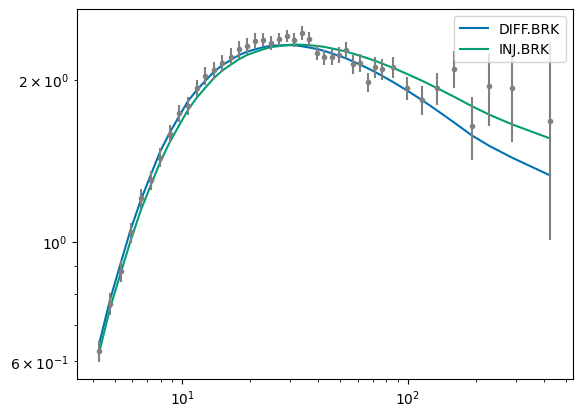

In [54]:
fig,ax = plt.figure(2,1)
plt.plot(E,E**2.7 * phi_CR_TOA_db,label = 'DIFF.BRK' )
plt.plot(E,E**2.7 * phi_CR_TOA_ib, label = 'INJ.BRK' )
plt.errorbar(E,E**2.7*ams_data.pbar_flux,E**2.7*ams_data.errors,fmt = '.', c='gray')
plt.xscale('log')
plt.yscale('log')
plt.legend()